# take-home final exam

name : **Antsa Rakotondrafara**

Note: this is an "open book" exam. You are free to use your notes, homework solutions, and all of the material uploaded to Canvas including Videos. You are not allowed to seek outside help (that includes searching the internet, other literature, or contacting anybody except the instructor).

The following you have seen before:

In [99]:
#!pip install matplotlib

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams

In [101]:
import copy


In [102]:

class TreeNode(object):
    def __init__(self, data, left_child = None, right_child = None):
        self.data = data
        self.left = left_child
        self.right =right_child

    def traverse_infix(self, result = None):
        if result == None:
            result = []

        if self.left:
            self.left.traverse_infix(result)

        result.append(self.data)

        if self.right:
            self.right.traverse_infix(result)

        return result

In [103]:
# create a graphical representation of a binary tree (plot_tree uses plot_node)
def plot_node(node, level = 1, posx = 0, posy = 0):

    width = 2200.0 * (0.5**(level))
    plt.text(posx, posy, str(node.data), horizontalalignment='center',fontsize=9)


    if node.left:
        px = [posx, posx-width]
        py = [posy-2, posy-15]
        plt.plot(px,py,'b-')
        plot_node(node.left, level+1, posx-width, posy-20)

    if node.right:
        plot_node(node.right, level+1, posx+width, posy-20)
        px = [posx, posx+width]
        py = [posy-2, posy-15]
        plt.plot(px,py,'b-')

def plot_tree(node, figsize=(10,6)):
    rcParams['figure.figsize'] = figsize
    fig, ax = plt.subplots()
    ax.axis('off')
    plot_node(node)
    plt.show()


## A Binary Search Tree

In [104]:
class BST(object):
    def __init__(self):
        self.tree = None

    def _find_node(self, node, obj):
        if node == None:
            return None
        if node.data == obj:
            return node
        if obj < node.data:
            return self._find_node(node.left, obj)
        else: # so obj > node.data
            return self._find_node(node.right, obj)

    def is_element(self, obj):
        """ Returns true if obj is contained in the BST """
        node = self._find_node(self.tree, obj)
        return node != None

    def _insert(self, node, obj):
        if obj < node.data:
            if node.left:
                self._insert(node.left, obj)
            else:
                node.left = TreeNode(obj)
        elif obj > node.data:
            if node.right:
                self._insert(node.right, obj)
            else:
                node.right = TreeNode(obj)
        # do nothing if equal

    def insert(self, obj):
        """ insert a new obj into the BST """
        if self.tree == None:
            self.tree = TreeNode(obj)
        else:
            self._insert(self.tree, obj)

    def _replace_child(self, parent, old, new):
        """ Replace old by new, which can be the left or right child of parent """
        if parent==None:
            self.tree = new
        elif parent.left == old:
            parent.left = new
        elif parent.right == old:
            parent.right = new
        else:
            assert(False)

    def _delete_node(self, parent, node, obj):
        if node == None:
            return
        if obj < node.data:
            # traverse left
            self._delete_node(node,node.left, obj)
        elif obj > node.data:
            # traverse right
            self._delete_node(node,node.right, obj)
        elif node.data == obj:
            if node.left == None:
                # no left child, so replace node by its right child
                self._replace_child(parent, node, node.right)
            elif node.right == None:
                # no right child, so replace node by its left child
                self._replace_child(parent, node, node.left)
            else: # node has two children:
                # TODO:
                # 1. find predecessor and replace node.data with it.
                par = node
                pred = par.left
                while pred.right != None:
                    par = pred
                    pred = pred.right
                node.data = pred.data
                print("Par data is "+par.data)
                #node = pred
                # 2. Then replace the predecessor by its left child.
                #self._replace_child(par, pred, pred.left) #need to change to replace pred with pred.left
                self._replace_child(par, pred, pred.left)

    def delete(self, obj):
        """ delete obj from the BST if it is contained """
        if self.tree == None:
            return
        self._delete_node(None, self.tree, obj)

    def height(self):
        """ Returns the height of the BST: -1 when empty, 0 for a single entry, etc. """
        # TODO
        if self.tree == None:
            return -1
        return(self._height(self.tree))

    def _height(self, node):
        if node == None:
            return(-1)
        else:
            return(1+ max(self._height(node.left), self._height(node.right)))



    #I added the folllowing helper function to find the parent of a node
    def _find_parent(self, node, origin):
        print("Currently passing through the origin ", origin.data)
        if origin.right == node:
            return origin
        elif origin.left == node:
            return origin
        try:
            return(self._find_parent(node, origin.left))
        except:
            return(self._find_parent(node, origin.right))



    def rotate_right(self, object):
        """ find the given object and rotate the tree to the right around this node """
        # TODO
        node = self._find_node(self.tree, object)
        if node == None:
            plot_tree(self.tree)
            return
        if node.left == None:
            plot_tree(self.tree)
            return
        temp = copy.deepcopy(node.left)
        temp.right = node
        self._replace_child(node, node.left, node.left.right)
        print("node.data = ", node.data)
        print("self.tree.data = ", self.tree.data)
        if self.tree == node:
            self.tree = temp
            print("I replaced the tree with temp "+ str( temp.data))
        else:
            parent = self._find_parent(node, self.tree)
            print("parent.data= ",parent.data)
            print("I replaced the node", node.data, "with temp", temp.data)
            self._replace_child(parent, node, temp)
            print("parent.data= ",parent.data)

        plot_tree(self.tree)


['Alice', 'Bob', 'Carol', 'Doug', 'Eve', 'Frank', 'Ginger', 'Howard', 'Irene', 'Jeff', 'Kathy', 'Luis', 'Mabel', 'Norm', 'Oprah', 'Peter', 'Queen', 'Ronald', 'Sarah', 'Tom', 'Ursala', 'Vince', 'Wanda', 'Yaakov', 'Zandra']


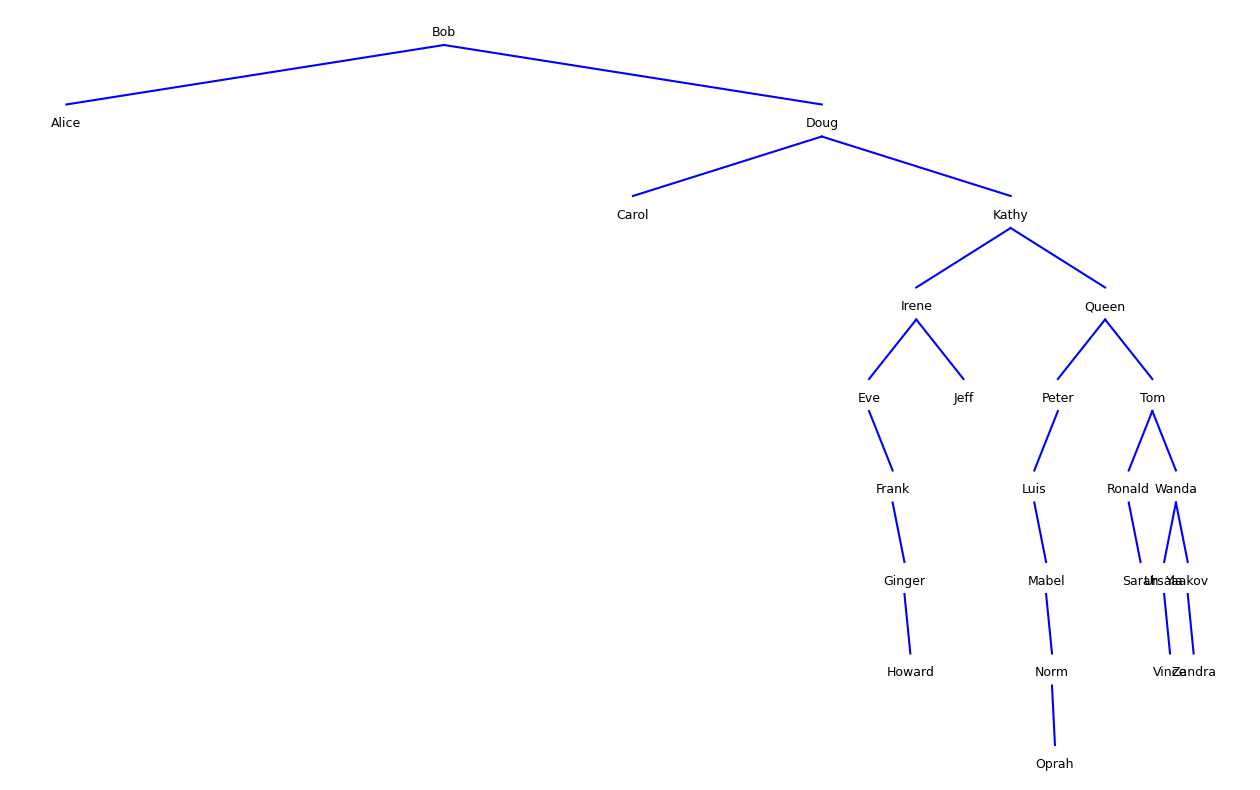

In [105]:
# An example:

people1 = ['Bob','Alice','Doug','Kathy','Queen','Carol','Irene','Tom',
           'Peter','Wanda','Yaakov', 'Luis','Zandra','Ronald','Mabel','Ursala','Eve',
           'Frank','Ginger','Norm','Sarah','Jeff','Vince','Howard',
           'Oprah']

bst1 = BST()
for p in people1:
    bst1.insert(p)

print (bst1.tree.traverse_infix())

plot_tree(bst1.tree, figsize=(16,10))

## Question 1
Finish the routine that computes the height of a BST (a tree with a single element has height 0):

In [106]:

print (bst1.height()) # Should be 8

b=BST()
b.insert("hello")
print (b.height()) # Should be 0
b.insert("world")
print (b.height()) # Should be 1

8
0
1


## Question 2:
finish the implementation of BST.delete above and then test it here

['Alice', 'Bernie', 'Bob', 'Carol', 'Doug', 'Kathy', 'Tom']


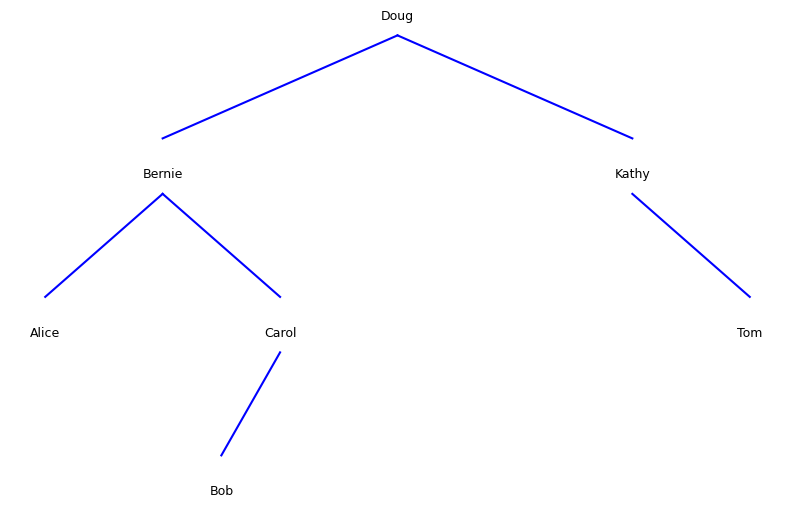

without Alice, Kathy, Carol:
['Bernie', 'Bob', 'Doug', 'Tom']


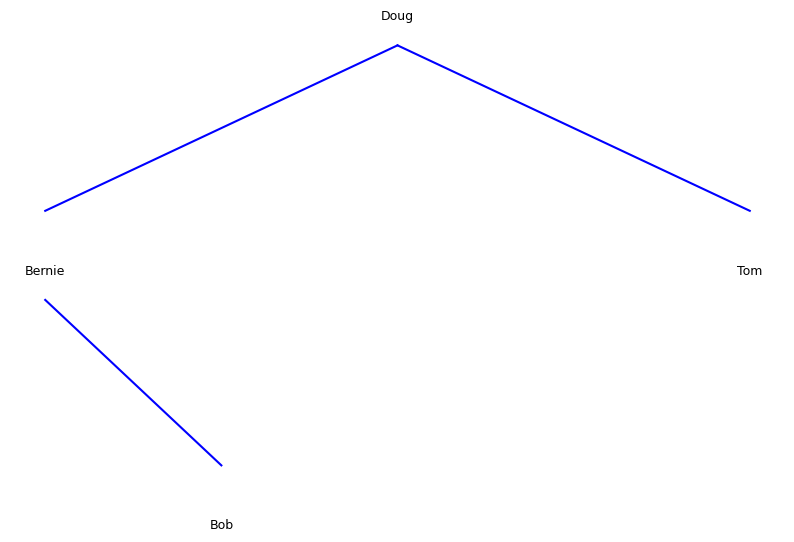

After adding two children:


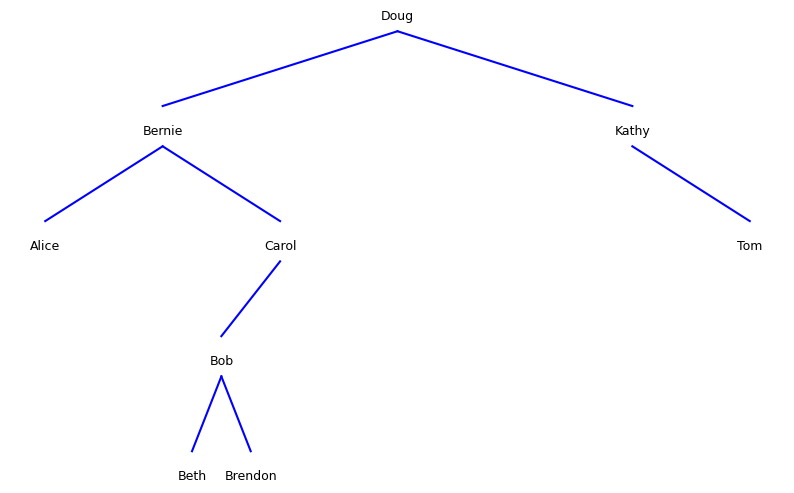

Now we remove Doug:
Par data is Bernie


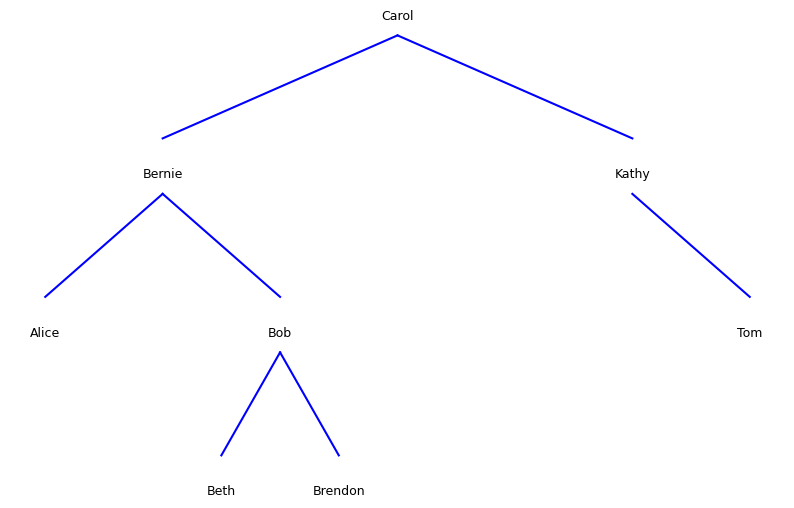

In [107]:
def make_tree():
    people3 = ['Doug','Bernie','Alice','Kathy','Tom','Carol', 'Bob']
    bst = BST()
    for p in people3:
        bst.insert(p)
    return bst

bst3 = make_tree()

print (bst3.tree.traverse_infix())
plot_tree(bst3.tree)

# no child:
bst3.delete('Alice')

# only right child:
bst3.delete('Kathy')

#only left child:
bst3.delete('Carol')

# this should have worked correctly:
print ("without Alice, Kathy, Carol:")
print (bst3.tree.traverse_infix())
plot_tree(bst3.tree)


# now test two children:
bst3 = make_tree()
bst3.insert("Brendon")
bst3.insert("Beth")
print ("After adding two children:")

plot_tree(bst3.tree)
assert bst3.is_element('Doug') == True
print ("Now we remove Doug:")
bst3.delete('Doug')
plot_tree(bst3.tree)

In [108]:
# check that Doug is gone and others are still here:
assert bst3.is_element('Doug') == False
assert bst3.is_element('Bob') == True
assert bst3.is_element('Brendon') == True
assert bst3.is_element('Beth') == True
assert bst3.is_element('Carol') == True
assert bst3.is_element('Frank') == False

## Question 3
What is the typical depth of a tree with n random elements? For values of n between 1 and 1000, create a BST by inserting n random integers (choose random.randint(0,100000) for each value) and record the height that this BST has.
Now create a plot with n on the x axis and three lines: 1) the height you just computed, 2) the minimum height a BST with n items can have, 3) 1 + 2 times the minimum height. The last line can be shown to be a good estimate of the height of a random tree: Do you agree?

The minimum height a BST with n items can have is $\lfloor \log_2(n)\rfloor$.


1 + 2 times the minimum height may be a good estimate of the height of a random tree. We already know the height must be between $\lfloor \log_2(n) \rfloor$ and $n$. I also expect to have more trees of in between length than long or short trees. Upon viewing the graphs, it looks like a good estimate to me. I don't have any mathematic explanation of it though.


In [109]:
import random
import math

def make_tree(n):
    bst = BST()
    for i in range(n):
        bst.insert( random.randint(0,100000))
    return bst.height()

In [110]:
ns = []
heights = []
minheights = []
estimate = []
for n in range(1,1001):
    ns.append(n)
    minheight = math.floor(math.log(n,2))
    ranheight = make_tree(n)
    est = ranheight+ 2*minheight
    heights.append(ranheight)
    minheights.append(minheight)
    estimate.append(est)

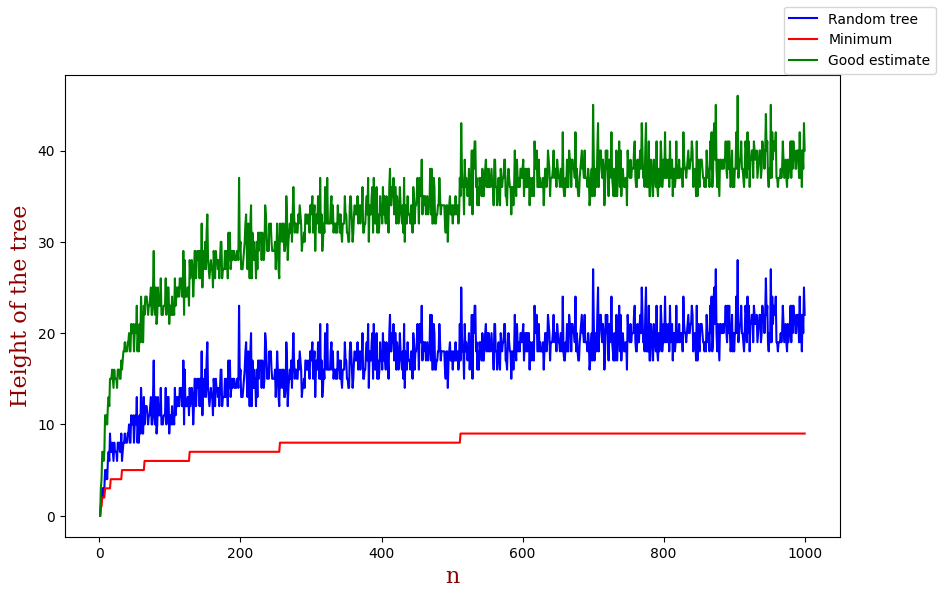

In [111]:
fig, ax = plt.subplots()
#ax.axis('off')
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
h = plt.plot(ns,heights,'b-', label = 'Random tree')
m = plt.plot(ns, minheights,'r-', label = "Minimum")
e = plt.plot(ns, estimate,'g-', label = "Good estimate")
plt.xlabel('n', fontdict=font)
plt.ylabel('Height of the tree', fontdict=font)

fig.legend(loc='outside upper right')
plt.show()

## Question 4
Implement the function rotate_right(object) that performs a tree rotation of the given node Q (which you find by searching for object). This operation is used to rebalance binary search trees (to minimize the total height of the tree). The rotation performs the following operation:

  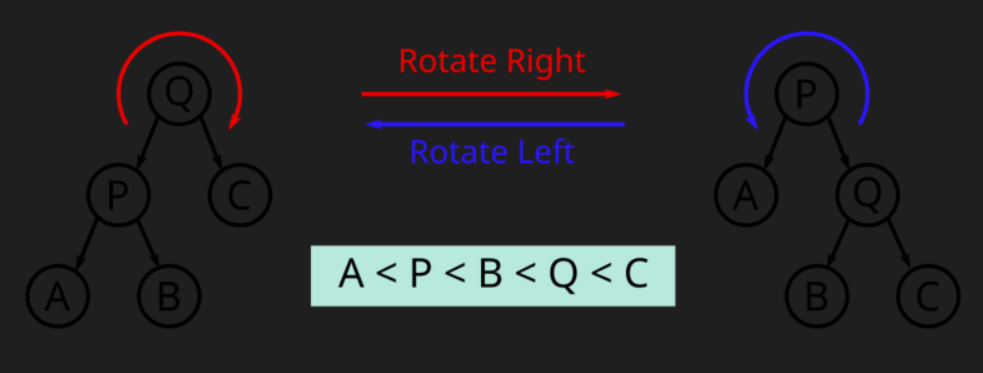

Note that the ordering of the nodes is still correctly preserved. Finally, make sure your code works even if some children do not exist.

Then test this:

['Alice', 'Bernie', 'Bob', 'Carol', 'Doug', 'Kathy', 'Tom']


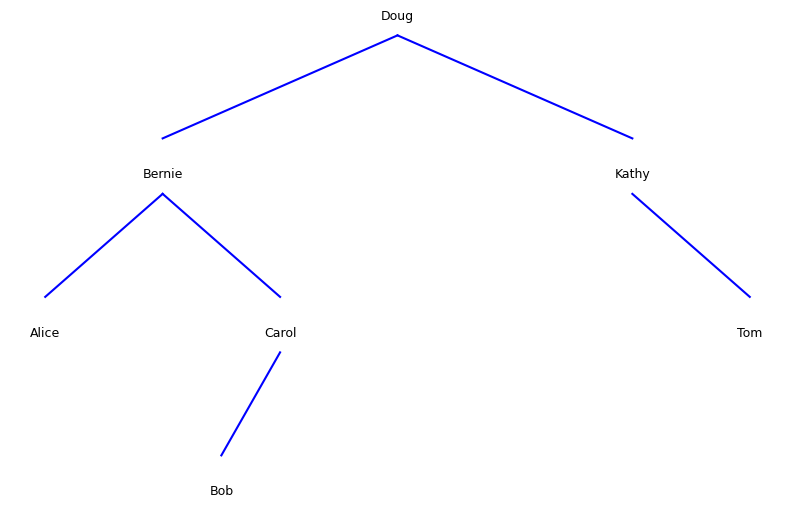

In [112]:
def make_tree():
    people3 = ['Doug','Bernie','Alice','Kathy','Tom','Carol', 'Bob']
    bst = BST()
    for p in people3:
        bst.insert(p)
    return bst

bst3 = make_tree()

print (bst3.tree.traverse_infix())
plot_tree(bst3.tree)



node.data =  Carol
self.tree.data =  Doug
Currently passing through the origin  Doug
Currently passing through the origin  Bernie
parent.data=  Bernie
I replaced the node Carol with temp Bob
parent.data=  Bernie


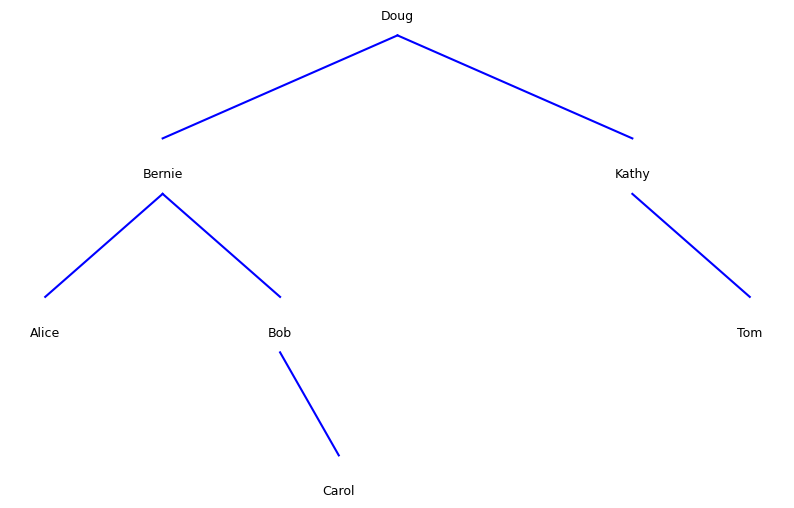

In [113]:
bst3.rotate_right("Carol")

node.data =  Doug
self.tree.data =  Doug
I replaced the tree with temp Bernie


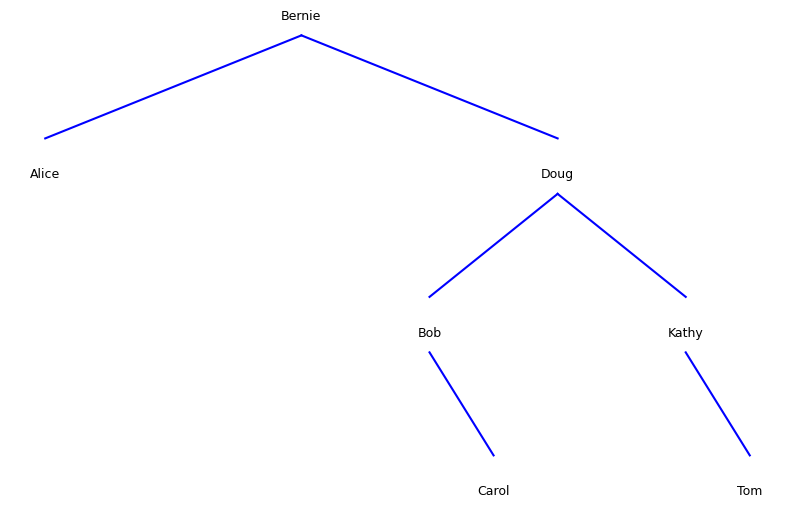

['Alice', 'Bernie', 'Bob', 'Carol', 'Doug', 'Kathy', 'Tom']


In [114]:
bst3.rotate_right("Doug")

print (bst3.tree.traverse_infix())
#plot_tree(bst3.tree)

node.data =  Doug
self.tree.data =  Bernie
Currently passing through the origin  Bernie
parent.data=  Bernie
I replaced the node Doug with temp Bob
parent.data=  Bernie


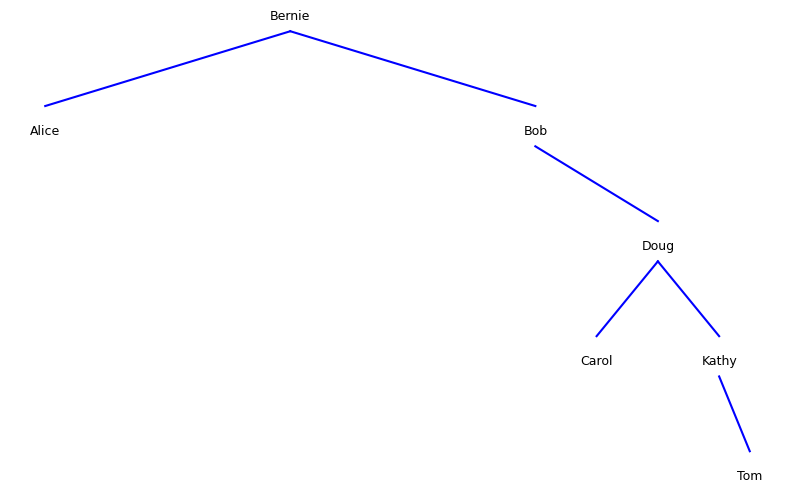

In [115]:
bst3.rotate_right("Doug")


This is the tree


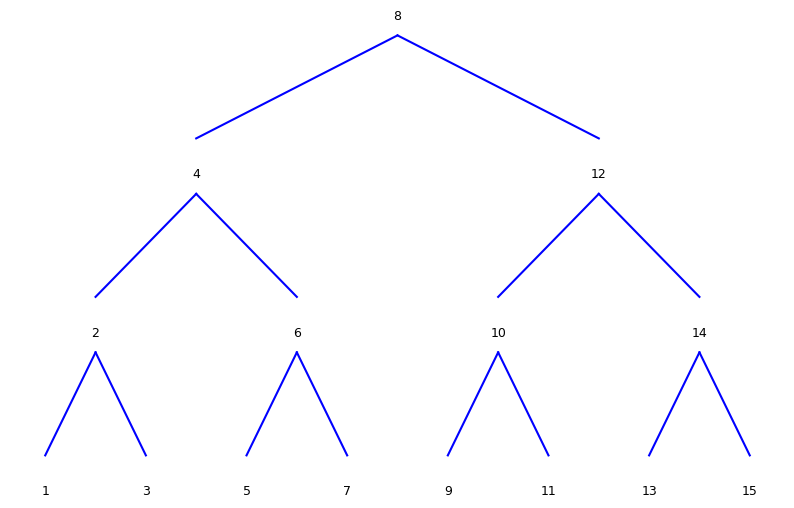

node.data =  12
self.tree.data =  8
Currently passing through the origin  8
parent.data=  8
I replaced the node 12 with temp 10
parent.data=  8


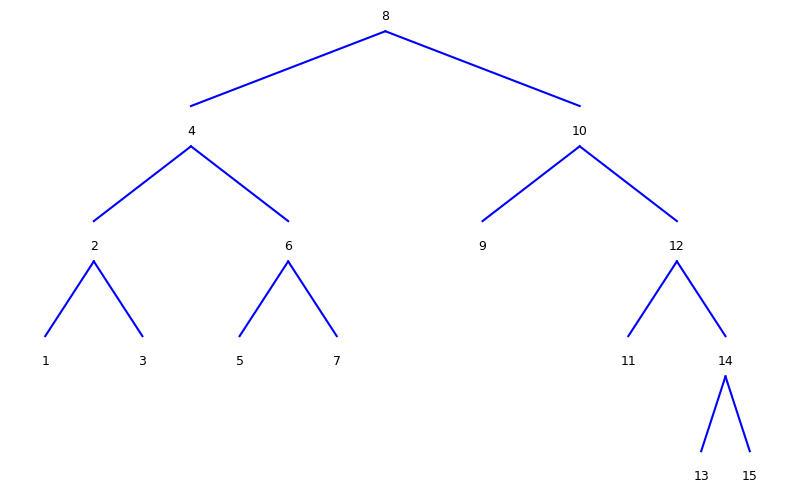

In [116]:
def make_tree2():
    numbers =[8,4,12,2,6,10,14,1,3,5,6,7,9,11,13,15]
    bst = BST()
    for p in numbers:
        bst.insert(p)
    return bst

bst3 = make_tree2()
print("This is the tree")
plot_tree(bst3.tree)

# print (bst3.tree.traverse_infix())
# plot_tree(bst3.tree)


#bst3.rotate_right(8)
bst3.rotate_right(12)

#print (bst3.tree.traverse_infix())
#plot_tree(bst3.tree)

node.data =  6
self.tree.data =  8
Currently passing through the origin  8
Currently passing through the origin  4
parent.data=  4
I replaced the node 6 with temp 5
parent.data=  4


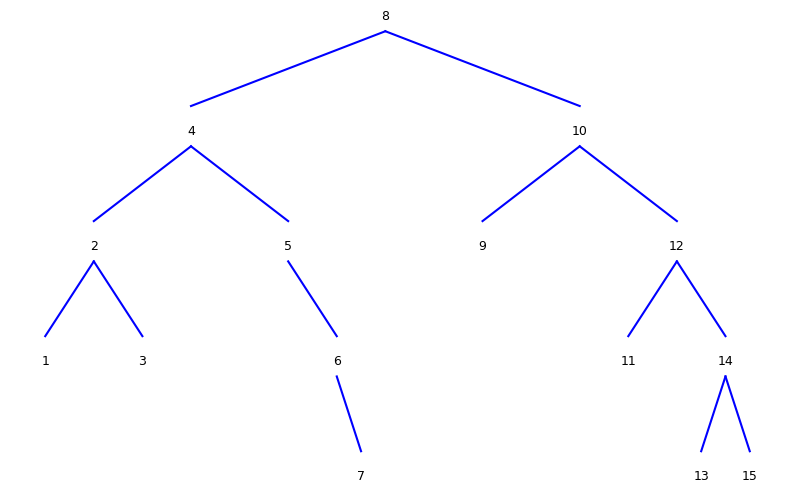

In [117]:
bst3.rotate_right(6)

node.data =  10
self.tree.data =  8
Currently passing through the origin  8
parent.data=  8
I replaced the node 10 with temp 9
parent.data=  8


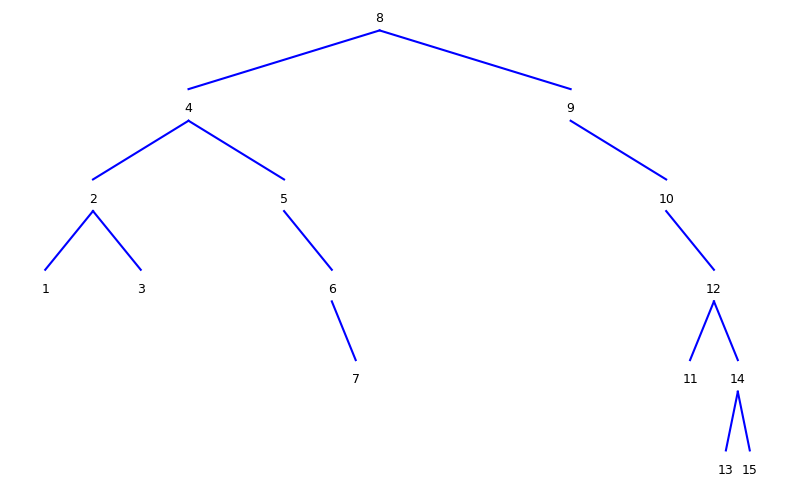

In [118]:
bst3.rotate_right(10)

node.data =  12
self.tree.data =  8
Currently passing through the origin  8
Currently passing through the origin  4
Currently passing through the origin  2
Currently passing through the origin  1
Currently passing through the origin  3
Currently passing through the origin  5
Currently passing through the origin  6
Currently passing through the origin  7
Currently passing through the origin  9
Currently passing through the origin  10
parent.data=  10
I replaced the node 12 with temp 11
parent.data=  10


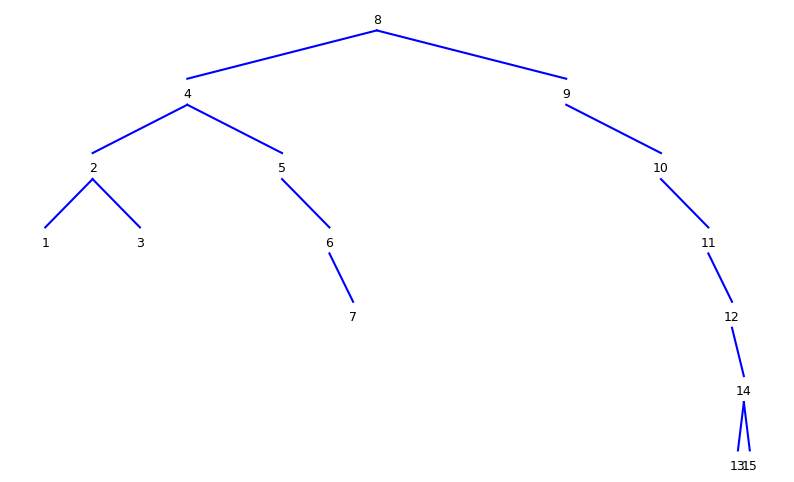

In [119]:
bst3.rotate_right(12)

node.data =  14
self.tree.data =  8
Currently passing through the origin  8
Currently passing through the origin  4
Currently passing through the origin  2
Currently passing through the origin  1
Currently passing through the origin  3
Currently passing through the origin  5
Currently passing through the origin  6
Currently passing through the origin  7
Currently passing through the origin  9
Currently passing through the origin  10
Currently passing through the origin  11
Currently passing through the origin  12
parent.data=  12
I replaced the node 14 with temp 13
parent.data=  12


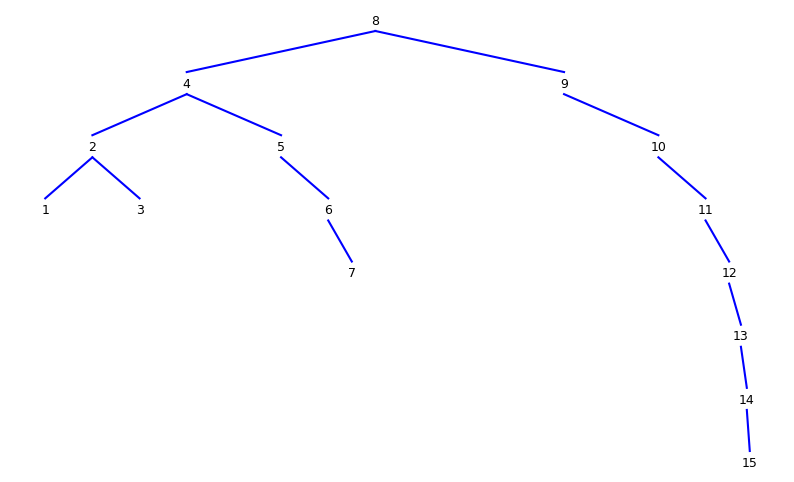

In [120]:
bst3.rotate_right(14)

In [121]:
print (bst3.tree.traverse_infix())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
